<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/13_6_Gradient_Clipping_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Clipping in Keras

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol> <ol>* Define clipvalue while defining the optimizer</ol></ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [2]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/AnalyticsVidya/DeepLearning/images/*jpg |wc -l

2352


In [6]:
# reading the csv file
data = pd.read_csv('/content/emergency_classification.csv')

In [21]:
# create random number generator
seed = 29
rng = np.random.RandomState(seed)

In [8]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('/content/drive/MyDrive/AnalyticsVidya/DeepLearning/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data

In [9]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [10]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [22]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [23]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [24]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

## 5. Compiling the model

In [25]:
# defining the adam optimizer and setting the learning rate as 10^-5 and adding clip value to clip the gradients
adam = Adam(lr=1e-3, clipvalue=1)

In [26]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model

In [27]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 [==============================] - 3s 165ms/step - loss: 0.7002 - accuracy: 0.5723 - val_loss: 0.6882 - val_accuracy: 0.5623
Epoch 2/100
13/13 [==============================] - 1s 51ms/step - loss: 0.6802 - accuracy: 0.5857 - val_loss: 0.6924 - val_accuracy: 0.5623
Epoch 3/100
13/13 [==============================] - 1s 54ms/step - loss: 0.6807 - accuracy: 0.5857 - val_loss: 0.6855 - val_accuracy: 0.5623
Epoch 4/100
13/13 [==============================] - 1s 54ms/step - loss: 0.6802 - accuracy: 0.5857 - val_loss: 0.6870 - val_accuracy: 0.5623
Epoch 5/100
13/13 [==============================] - 1s 55ms/step - loss: 0.6792 - accuracy: 0.5857 - val_loss: 0.6870 - val_accuracy: 0.5623
Epoch 6/100
13/13 [==============================] - 1s 55ms/step - loss: 0.6802 - accuracy: 0.5857 - val_loss: 0.6855 - val_accuracy: 0.5623
Epoch 7/100
13/13 [==============================] - 1s 53ms/step - loss: 0.6819 - accuracy: 0.5857 - val_loss: 0.6860 - val_accuracy: 0.5623
Epoch

## 7. Evaluating model performance

In [33]:
prediction = model.predict(X_valid)
prediction = prediction.reshape(706,)

# converting probabilities to classes
prediction_int = prediction >= 0.9
prediction_int = prediction_int.astype(int)

23/23 [==============================] - 0s 9ms/step


In [34]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.5623229461756374 %


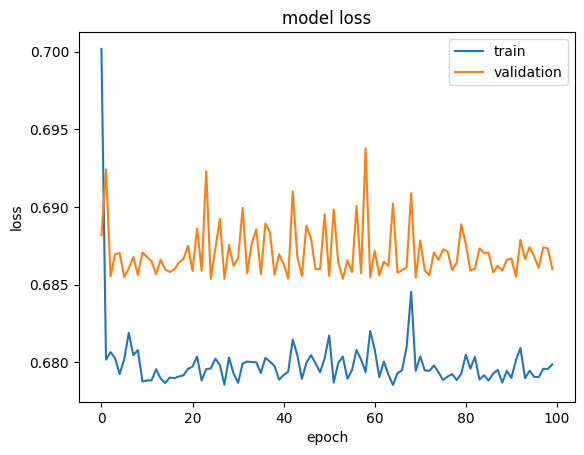

In [35]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()